In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import PIL
import cv2
import os
import pathlib

In [3]:
data_dir = tf.keras.utils.get_file('flower_photos', origin = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', cache_dir='.', untar=True)

228813984/228813984 [==============================] - 36s 0us/step


In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
#import pathlib

data_dir = pathlib.Path(data_dir)

In [6]:
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

roses = list(data_dir.glob('roses*/*'))
daisy = list(data_dir.glob('daisy*/*'))
dandelion = list(data_dir.glob('dandelion*/*'))
sunflowers = list(data_dir.glob('sunflowers*/*'))
tulips = list(data_dir.glob('tulips*/*'))

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

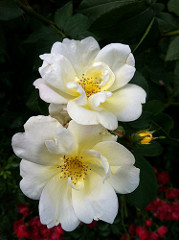

In [9]:
PIL.Image.open(flowers_images_dict['roses'][0])

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
# str(flowers_images_dict['roses'][0])

img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [12]:
img1 = cv2.resize(img, (180,180))

In [13]:

img1.shape

(180, 180, 3)

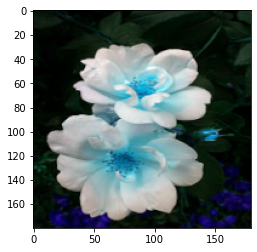

In [14]:
plt.imshow(img1)

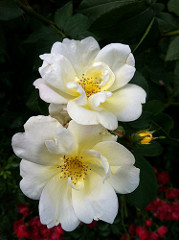

In [15]:
PIL.Image.open(flowers_images_dict['roses'][0])

In [16]:
X = []
y = []

In [17]:
for key, value_list in flowers_images_dict.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img, (180,180))
        X.append(img)
        y.append(flowers_labels_dict[key])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X = X / 255

In [20]:
X.shape

(3670, 180, 180, 3)

In [21]:
y.shape

(3670,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3), (2752,), (918,))

X_train = X_train / 255
X_test = X_test / 255

model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
])

model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model.fit(X_train, y_train, epochs = 30)

In [ ]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
   keras.layers.experimental.preprocessing.RandomRotation(0.1),
      keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])


import pickle
model = pickle.load(open('finalized_model.sav','rb'))

In [37]:
model = keras.models.load_model('.\modelSave')

OSError: No file or directory found at .\modelSave